## Elements Of Computational Design

### Short Assignment 4 : Analyzing the Titanic dataset

References: Class workshop, Group Assignment, http://pandas.pydata.org/pandas-docs/version/0.8.1/basics.html

I have tried to address some of the key questions suggested in the assignment instructions using dataframes.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train(1).csv', header= 0)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### There are a number of unknown values in the above data set. The question that I am trying to answer is 'Was it advantageous for survival to be a child? To be above 65?', adding the query of what was the survival rate of the ages inbetween that of a child and 65 years?...

Reference: Wikipedia - The United Nations Convention on the Rights of the Child defines child as "a human being below the age of 18 years unless under the law applicable to the child, majority is attained earlier".

Therefore, I have to consider three Age ranges:
>Below 18years

>18 years to 65 years

>Above 65 years

In [6]:
df1 = df[df.Age<18]

In [7]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 7 to 875
Data columns (total 12 columns):
PassengerId    113 non-null int64
Survived       113 non-null int64
Pclass         113 non-null int64
Name           113 non-null object
Sex            113 non-null object
Age            113 non-null float64
SibSp          113 non-null int64
Parch          113 non-null int64
Ticket         113 non-null object
Fare           113 non-null float64
Cabin          19 non-null object
Embarked       113 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 11.5+ KB


### In order to assign age values for unknown data, I am going to find the mean value of age for the individual classes in df1

In [9]:
df1a = df1[df1.Pclass==1]

In [10]:
df1a.Age.mean

<bound method Series.mean of 297     2.00
305     0.92
307    17.00
329    16.00
435    14.00
445     4.00
504    16.00
550    17.00
689    15.00
781    17.00
802    11.00
853    16.00
Name: Age, dtype: float64>

### I made a mistake- I already assigned the data in df to df1 as those passengers whose age was less than 18 so, this would have ignored the unknown data entries!

### I will now consider the source data as the input for assigning values for unknown ages based on mean age values from class segregation

In [11]:
dfclass1 = df[df.Pclass==1]

In [12]:
dfclass1.Age.mean

<bound method Series.mean of 1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
27     19.0
30     40.0
31      NaN
34     28.0
35     42.0
52     49.0
54     65.0
55      NaN
61     38.0
62     45.0
64      NaN
83     28.0
88     23.0
92     46.0
96     71.0
97     23.0
102    21.0
110    47.0
118    24.0
124    54.0
136    19.0
137    37.0
139    24.0
151    22.0
155    51.0
       ... 
763    36.0
765    51.0
766     NaN
779    43.0
781    17.0
782    29.0
789    46.0
793     NaN
796    49.0
802    11.0
806    39.0
809    33.0
815     NaN
820    52.0
822    38.0
829    62.0
835    39.0
839     NaN
842    30.0
849     NaN
853    16.0
856    45.0
857    51.0
862    48.0
867    31.0
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, dtype: float64>

### The mean age of the people travelling First class is 38 years

In [13]:
dfclass2 = df[df.Pclass==2]

In [14]:
dfclass2.Age.mean

<bound method Series.mean of 9      14.00
15     55.00
17       NaN
20     35.00
21     34.00
33     66.00
41     27.00
43      3.00
53     29.00
56     21.00
58      5.00
66     29.00
70     32.00
72     21.00
78      0.83
84     17.00
98     34.00
99     34.00
117    29.00
120    21.00
122    32.50
123    32.50
133    29.00
134    25.00
135    23.00
144    18.00
145    19.00
148    36.50
149    42.00
150    51.00
       ...  
732      NaN
733    23.00
734    23.00
747    30.00
750     4.00
754    48.00
755     0.67
757    18.00
772    57.00
774    54.00
791    16.00
795    39.00
800    34.00
801    31.00
808    39.00
812    35.00
817    31.00
827     1.00
831     0.83
841    16.00
848    28.00
854    44.00
861    21.00
864    24.00
865    42.00
866    27.00
874    28.00
880    25.00
883    28.00
886    27.00
Name: Age, dtype: float64>

### The mean age of the people travelling Second class is 14 years

In [16]:
dfclass3 = df[df.Pclass==3]

In [17]:
dfclass3.Age.mean

<bound method Series.mean of 0      22.0
2      26.0
4      35.0
5       NaN
7       2.0
8      27.0
10      4.0
12     20.0
13     39.0
14     14.0
16      2.0
18     31.0
19      NaN
22     15.0
24      8.0
25     38.0
26      NaN
28      NaN
29      NaN
32      NaN
36      NaN
37     21.0
38     18.0
39     14.0
40     40.0
42      NaN
44     19.0
45      NaN
46      NaN
47      NaN
       ... 
837     NaN
838    32.0
840    20.0
843    34.5
844    17.0
845    42.0
846     NaN
847    35.0
850     4.0
851    74.0
852     9.0
855    18.0
858    24.0
859     NaN
860    41.0
863     NaN
868     NaN
869     4.0
870    26.0
873    47.0
875    15.0
876    20.0
877    19.0
878     NaN
881    33.0
882    22.0
884    25.0
885    39.0
888     NaN
890    32.0
Name: Age, dtype: float64>

### The mean age of the people travelling Third class is 22 years

### Assigning mean ages as the value for missing data in respective dataframes which were classified according to Pclass(Passenger Class).

In [18]:
dfclass1.Age.fillna(38, inplace=True)

C:\Users\Kat09\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
dfclass2.Age.fillna(14, inplace=True)

C:\Users\Kat09\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
dfclass3.Age.fillna(22, inplace=True)

C:\Users\Kat09\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
dfclass1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [22]:
dfclass2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,14.00,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.00,1,0,11668,21.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.00,1,0,2926,26.0000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.00,0,0,C.A. 31026,10.5000,NaN,S


In [23]:
dfclass3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,22.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Now that age values have been added to unknown entities - Combining all the different dataframes into 1 dataframe for analysis of age factoring into the survival rate.

In [24]:
dfage = [dfclass1, dfclass2, dfclass3]
dfageFinal = pd.concat(dfage)

In [25]:
dfageFinal

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


### Visualizing the age of the complete data set with a histogram

Reference code from workshop video

In [26]:
get_ipython().magic(u'matplotlib inline')

In [27]:
import pylab as P

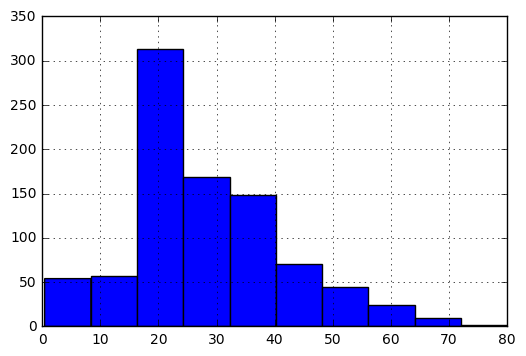

In [28]:
dfageFinal.Age.hist()

### Analyzing survival rate based on age

In [29]:
dfChild = dfageFinal[dfageFinal.Age<18]

In [30]:
dfChild.Survived.value_counts()

1    65
0    59
Name: Survived, dtype: int64

### Taking value '1' as yes and '0' as no for Survived column:

Out of 124 Children

> 65 children survived and 

> 59 children lost their lives

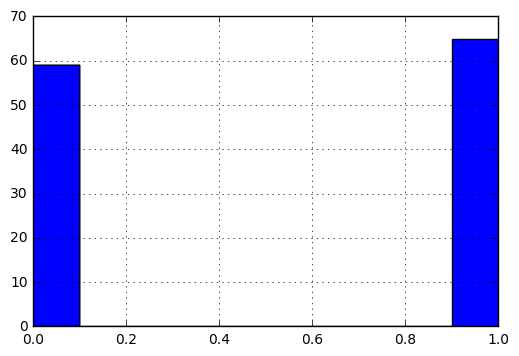

In [31]:
dfChild.Survived.hist()

In [32]:
dfSenior = dfageFinal[dfageFinal.Age>65]

In [33]:
dfSenior.Survived.value_counts()

0    7
1    1
Name: Survived, dtype: int64

Out of 8 Seniors (Above the age of 65)

> 1 Senior survived and 

> 7 lost their lives

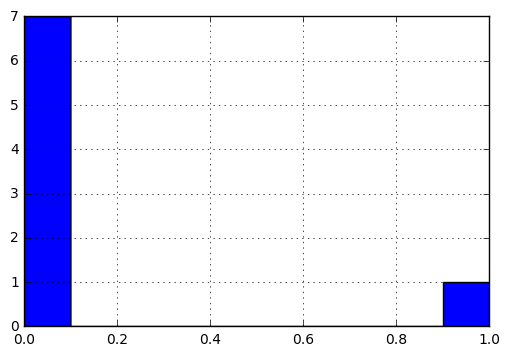

In [34]:
dfSenior.Survived.hist()

In [39]:
dfAdult = dfageFinal[dfageFinal.Age>=18]

In [40]:
dfAdultA = dfAdult[dfAdult.Age<=65]

In [41]:
dfAdultA.Survived.value_counts()

0    483
1    276
Name: Survived, dtype: int64

Out of 759 Adults (Between the ages of 18 to 65)

> 276 Adults survived and 

> 483 lost their lives

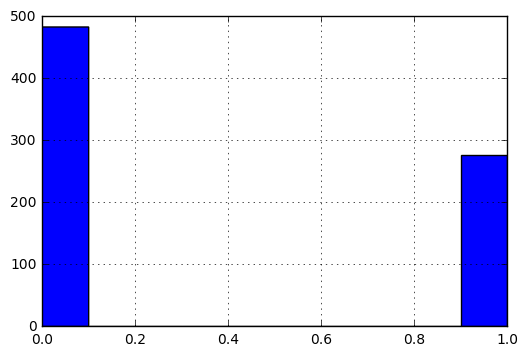

In [42]:
dfAdultA.Survived.hist()

### I don't know how to edit the settings of the histogram in order to remove the plotting range between 0 and 1- 
### I am pretty sure there is nothing called half-dead!

### Based on the above analysis, I can conclude that:
> Children (below 18 years of age) had a 52.4% survival rate 

> Adults (Between the Ages of 18 to 65 years) had 36.4% survival rate

> Seniors (Above the age of 65 years) had 12.5% survival rate

### Therefore, children had a higher chance of survival than both adults and seniors.

## The next question I would like to address is:
## Was it advantageous for survival to have been traveling with family members on the Titanic?

In [43]:
dfageFinal # Taking the dataframe to which I added the unknown values of ages based on mean values from different Passengerclass data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [45]:
dfageFinal['FamilySize'] = dfageFinal['SibSp']+dfageFinal['Parch'] # Adding the column 'Familysize' to include siblings/spouse and parents/childre in order to understand who all were travelling with any family member

In [46]:
dfageFinal

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B78,C,1
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,1
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,1


In [49]:
dfFamily = dfageFinal[dfageFinal.FamilySize>0] # Assigning all those who had atleast 1 family member into a new dataframe

In [50]:
dfOrphan = dfageFinal[dfageFinal.FamilySize==0]  # Assigning all those who had no family members into a new dataframe

In [51]:
dfFamily.Survived.value_counts()

1    179
0    175
Name: Survived, dtype: int64

In [52]:
dfOrphan.Survived.value_counts()

0    374
1    163
Name: Survived, dtype: int64

### Taking value '1' as yes and '0' as no for Survived column:

Out of 354 people WITH family members onboard

> 179 survived while

> 175 lost their lives

out of 537 people WITHOUT any family members onboard

> 163 survived while 

> 374 lost their lives


### I can conclude from the above analysis that though the number of people without family members onboard were significantly higher, their survival rate of 30.35% was very much lower than the 50.56% survival rate of those with family members onboard the TITANIC.